In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.signal import savgol_filter

In [2]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv')

In [4]:
df.head(100)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
5,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
6,58400,2015-09-16,McKesson,128090,17520,https://www.linkedin.com/company/1900,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
8,58434,2015-09-16,IBM,2542182,414139,https://www.linkedin.com/company/1009,Information Technology and Services,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
9,58401,2015-09-16,MasterCard,147619,9658,https://www.linkedin.com/company/3015,Information Technology and Services,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [73]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [38]:

tmp = df[df['company_name']=='Microsoft']

In [39]:
tmp.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
97,58362,2015-09-16,Microsoft,2539829,123785,https://www.linkedin.com/company/1035,Computer Software,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
314,58362,2015-09-17,Microsoft,2541663,123811,https://www.linkedin.com/company/1035,Computer Software,2015-09-17 00:00:00+00,2015-09-17 00:00:00+00,NaN,NaN,NaN,NaN,NaN
682,58362,2015-09-18,Microsoft,2544131,123809,https://www.linkedin.com/company/1035,Computer Software,2015-09-18 00:00:00+00,2015-09-18 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1110,58362,2015-09-19,Microsoft,2545754,123816,https://www.linkedin.com/company/1035,Computer Software,2015-09-19 00:00:00+00,2015-09-19 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1582,58362,2015-09-20,Microsoft,2547319,123839,https://www.linkedin.com/company/1035,Computer Software,2015-09-20 00:00:00+00,2015-09-20 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [34]:

df_price = pd.read_json("https://api.tiingo.com/tiingo/daily/MSFT/prices?startDate=2015-9-16&endDate=2018-7-17&token=a1d8d376d2c5693a849faf5e275f1f2d0d4ca747")


In [35]:
df_price.to_csv("microsoft.csv", index=False)

In [36]:
df_price.head()

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,date,divCash,high,low,open,splitFactor,volume
0,41.364756,41.439456,40.935235,41.056622,23372162,44.30,2015-09-16,0.0,44.38,43.84,43.97,1,23372162
1,41.318069,42.018375,41.159333,41.355419,32768161,44.25,2015-09-17,0.0,45.00,44.08,44.29,1,32768161
2,40.599088,41.075296,40.459027,40.617763,63143684,43.48,2015-09-18,0.0,43.99,43.33,43.50,1,63143684
3,41.187345,41.523492,40.711137,40.729812,26177224,44.11,2015-09-21,0.0,44.47,43.60,43.62,1,26177224
4,40.991260,41.131321,40.440352,40.505714,28085903,43.90,2015-09-22,0.0,44.05,43.31,43.38,1,28085903


In [50]:
df_cat = tmp[['as_of_date','employees_on_platform']].set_index('as_of_date')
df_cat['employees_on_platform'] = savgol_filter(df_cat['employees_on_platform'], 201, 2)

Text(0,0.5,'employees number')

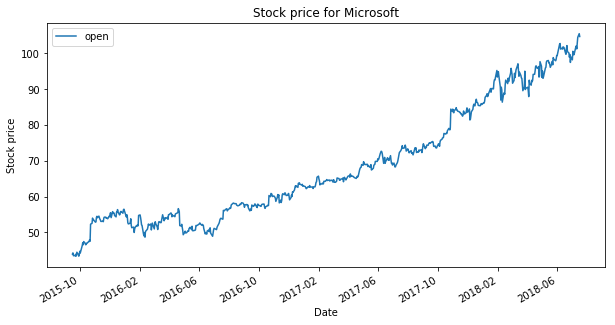

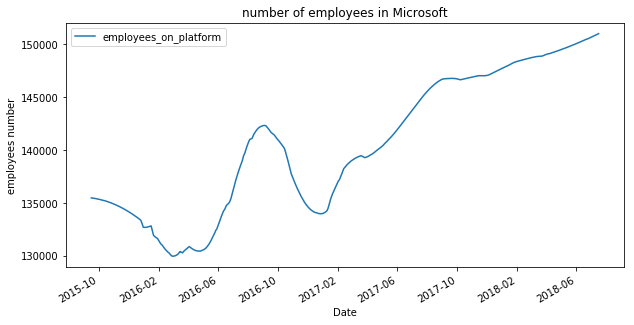

In [54]:
ax1 = df_price[['date','open']].set_index('date').plot(figsize=(10,5),title = 'Stock price for Microsoft')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock price')
ax = df_cat.plot(figsize=(10,5),title = 'number of employees in Microsoft')
ax.set_xlabel('Date')
ax.set_ylabel('employees number')

In [74]:
df_cat = df.groupby(['as_of_date','industry'])['employees_on_platform'].sum().unstack()


In [75]:
df_cat['Total employees'] = df.groupby(['as_of_date'])['employees_on_platform'].sum()

In [76]:
df_cat['Total employees'] = savgol_filter(df_cat['Total employees'], 201, 2)

In [79]:
df_price = pd.read_json("https://api.tiingo.com/tiingo/daily/NDAQ/prices?startDate=2015-9-16&endDate=2018-7-17&token=a1d8d376d2c5693a849faf5e275f1f2d0d4ca747")

Text(0,0.5,'Stock price')

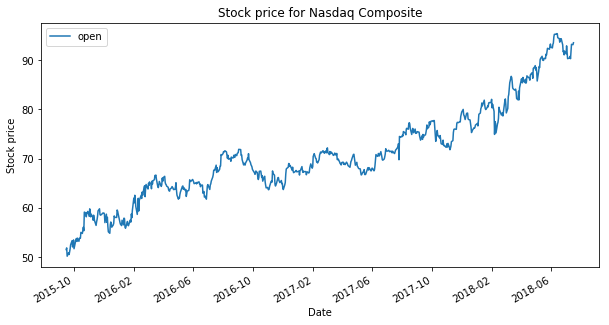

In [81]:

ax1 = df_price[['date','open']].set_index('date').plot(figsize=(10,5),title = 'Stock price for Nasdaq Composite')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock price')


Text(0,0.5,'employees number')

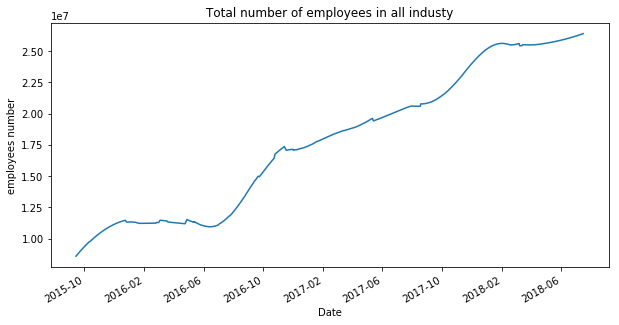

In [82]:
ax = df_cat['Total employees'].plot(figsize=(10,5),title = 'Total number of employees in all industy')
ax.set_xlabel('Date')
ax.set_ylabel('employees number')